In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [58]:
df = pd.read_csv('../Data/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [59]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [65]:
scale = MinMaxScaler()
Scaled_data = df.iloc[:,:-1] = scale.fit_transform(df.iloc[:,:-1])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


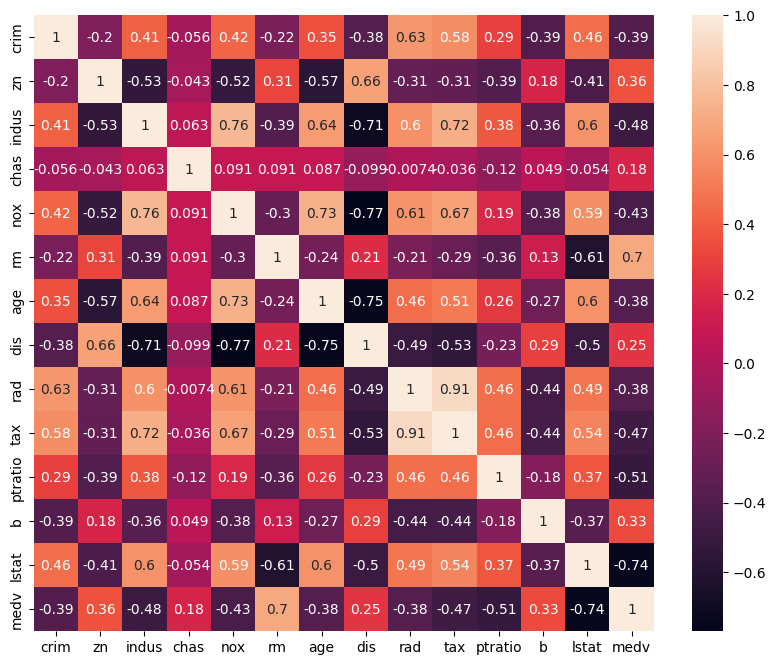

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [62]:
x = df.iloc[:,:-1]
y = df[["rm","b","zn"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
comparison=pd.DataFrame({"Actual":y_test.values.flatten(),"Predicted":y_test_pred.flatten()})
comparison


,Actual,Predicted
0,0.547040,5.470397e-01
1,0.996470,9.964698e-01
2,0.000000,4.926481e-16
3,0.612569,6.125695e-01
4,1.000000,1.000000e+00
...,...,...
301,0.997705,9.977054e-01
302,0.000000,8.702437e-16
303,0.522131,5.221307e-01
304,0.965530,9.655303e-01


In [63]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test}")
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train RMSE: {rmse_train}")

Test RMSE: 7.71351067881442e-16
Train RMSE: 7.434339382369642e-16


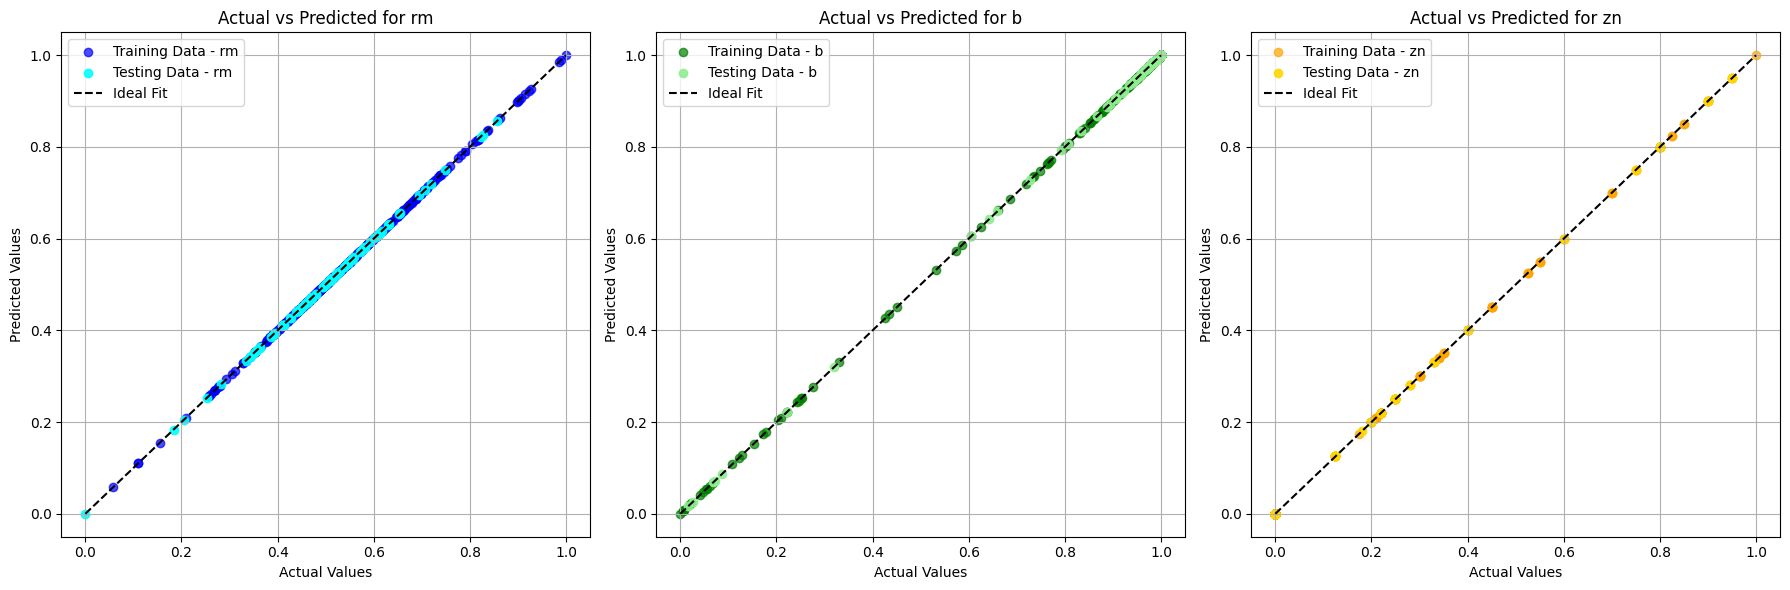

In [64]:
comparison = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": y_test_pred.flatten()
})

columns = ["rm", "b", "zn"]
train_colors = ['blue', 'green', 'orange']  
test_colors = ['cyan', 'lightgreen', 'gold'] 

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(columns):
    axes[i].scatter(y_train[col], y_train_pred[:, i], color=train_colors[i], alpha=0.7, label=f"Training Data - {col}")   
    axes[i].scatter(y_test[col], y_test_pred[:, i], color=test_colors[i], alpha=0.9, label=f"Testing Data - {col}")
    
    min_val = min(y[col].min(), y[col].min())
    max_val = max(y[col].max(), y[col].max())
    axes[i].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label="Ideal Fit")

    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")
    axes[i].set_title(f"Actual vs Predicted for {col}")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()